In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from scipy.spatial.distance import cdist
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split



In [127]:
data = pd.read_csv('iris.csv')
data.head()data = pd.read_csv('iris.csv')
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [128]:
dic={"target":{'Iris-setosa':1, 'Iris-versicolor':2, 'Iris-virginica':3}}
data=data.replace(dic)

In [129]:
X=data.drop('target',axis=1)
y=data['target']

In [130]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,shuffle=True)

In [131]:
kmeans = KMeans(n_clusters=3,init="k-means++")

In [132]:
kmeans.fit(X_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [145]:
predict1=kmeans.predict(X_test)
accuracy = accuracy_score(predict1,y_test)
print("ACCURACY=",accuracy)

ACCURACY= 0.6888888888888889


In [134]:
data["PREDICTED"]=kmeans.predict(X)
data["PREDICTED"].unique()

array([1, 0, 2])

In [135]:
df1=data[data['PREDICTED']==0]
df2=data[data['PREDICTED']==1]
df3=data[data['PREDICTED']==2]

Text(0.5, 1.0, 'SL VS PL')

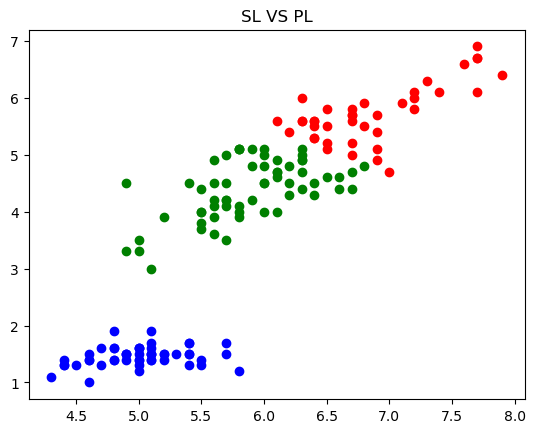

In [141]:
import matplotlib.pyplot as plt

plt.scatter(df1["sepal length (cm)"],df1["petal length (cm)"],color='red')
plt.scatter(df2["sepal length (cm)"],df2["petal length (cm)"],color='blue')
plt.scatter(df3["sepal length (cm)"],df3["petal length (cm)"],color='green')
plt.title("SL VS PL")


Text(0.5, 1.0, 'SW VS PW')

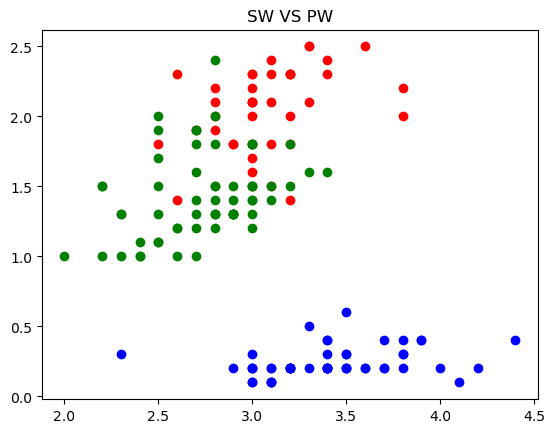

In [142]:
import matplotlib.pyplot as plt

plt.scatter(df1["sepal width (cm)"],df1["petal width (cm)"],color='red')
plt.scatter(df2["sepal width (cm)"],df2["petal width (cm)"],color='blue')
plt.scatter(df3["sepal width (cm)"],df3["petal width (cm)"],color='green')
plt.title("SW VS PW")



Text(0.5, 1.0, 'SL VS SW')

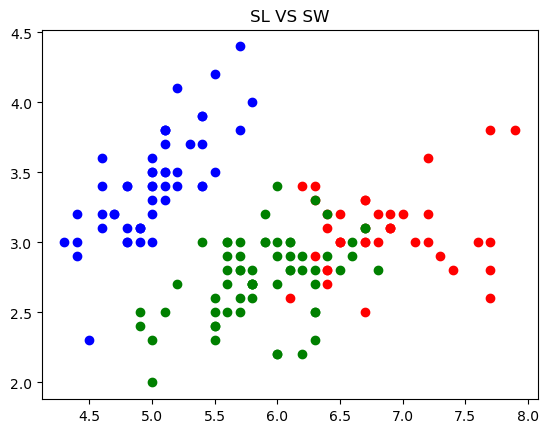

In [144]:
import matplotlib.pyplot as plt

plt.scatter(df1["sepal length (cm)"],df1["sepal width (cm)"],color='red')
plt.scatter(df2["sepal length (cm)"],df2["sepal width (cm)"],color='blue')
plt.scatter(df3["sepal length (cm)"],df3["sepal width (cm)"],color='green')

plt.title("SL VS SW")


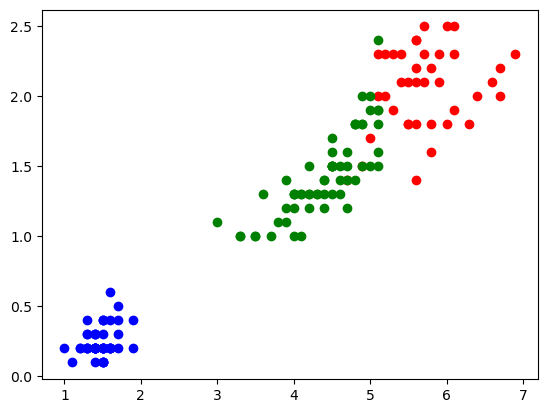

In [139]:
import matplotlib.pyplot as plt

plt.scatter(df1["petal length (cm)"],df1["petal width (cm)"],color='red')
plt.scatter(df2["petal length (cm)"],df2["petal width (cm)"],color='blue')
plt.scatter(df3["petal length (cm)"],df3["petal width (cm)"],color='green')
plt.title("SL VS PL")



In [123]:
centroids = kmeans.cluster_centers_
labels = kmeans.labels_
centroids

array([[5.86097561, 2.70487805, 4.35853659, 1.40243902],
       [5.01944444, 3.40277778, 1.45555556, 0.25      ],
       [6.7       , 3.03571429, 5.59285714, 2.07142857]])

In [124]:
within_cluster_distances = np.sum(np.min(cdist(X, kmeans.cluster_centers_, 'euclidean'), axis=1))

In [140]:
print(f"Within-Cluster Sum of Squared Distances (WCSS): {within_cluster_distances}")


Within-Cluster Sum of Squared Distances (WCSS): 97.15795894540028
